In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import torch
import numpy as np
import torch.nn as nn
import math
torch.manual_seed(0)

In [2]:
sales = pd.read_csv(r"house_data.csv")

In [3]:
sales.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
sales.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


# Data Exploration

<AxesSubplot:xlabel='sqft_living', ylabel='price'>

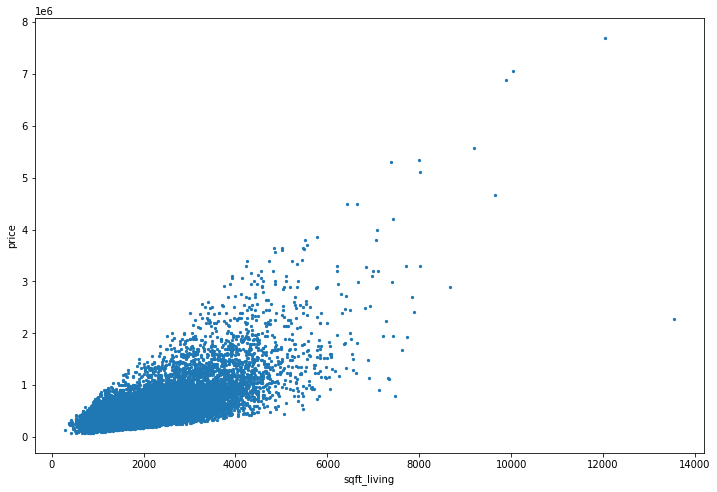

In [5]:
sales.plot.scatter(x = 'sqft_living', y = 'price', figsize=(12,8), s=5)

In [6]:
my_features = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors']

In [7]:
features_np = sales[my_features].values

In [8]:
target_np = sales['price'].values

In [9]:
test_indices = np.random.choice(len(features_np), int(len(features_np)*0.2), replace=False)
all_indices = np.arange(len(features_np))
train_indices = np.setdiff1d(all_indices, test_indices)

In [10]:
features_np_train = features_np[train_indices]
features_np_test = features_np[test_indices]
target_np_train = target_np[train_indices]
target_np_test = target_np[test_indices]

# Datasets and Dataloader

In [11]:
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader

In [12]:
features_tensor_train = torch.from_numpy(features_np_train)
target_tensor_train = torch.from_numpy(target_np_train)
features_tensor_train = features_tensor_train.to(torch.float32)
target_tensor_train = target_tensor_train.to(torch.float32)

In [13]:
# Define dataset
dataset_train = TensorDataset(features_tensor_train, target_tensor_train)

# Split into training and test

In [14]:
# Define data loader
batch_size = int(len(dataset_train)/10)
train_dl = DataLoader(dataset_train, batch_size, shuffle=True)

In [15]:
count = 1
for xb, yb in train_dl:
    print("This is the batch {}".format(count))
    print(xb)
    print(yb)
    count += 1
    break

This is the batch 1
tensor([[3.0000e+00, 2.5000e+00, 1.7200e+03, 6.8470e+03, 2.0000e+00],
        [3.0000e+00, 2.0000e+00, 1.4200e+03, 3.6000e+03, 1.5000e+00],
        [4.0000e+00, 2.2500e+00, 1.8500e+03, 2.3400e+03, 2.5000e+00],
        ...,
        [5.0000e+00, 4.2500e+00, 4.2300e+03, 6.9070e+03, 2.0000e+00],
        [3.0000e+00, 2.5000e+00, 2.9200e+03, 3.9420e+03, 3.0000e+00],
        [3.0000e+00, 1.7500e+00, 1.5800e+03, 2.0588e+04, 1.0000e+00]])
tensor([ 263000.,  716000.,  496800.,  ..., 1400000.,  868500.,  625000.])


## nn.Linear building the model

In [16]:
# Define model
model = nn.Linear(len(my_features), 1)
print(model.weight)
print(model.bias)

Parameter containing:
tensor([[ 0.3295, -0.1010,  0.1922, -0.3696, -0.1595]], requires_grad=True)
Parameter containing:
tensor([-0.2472], requires_grad=True)


In [17]:
# Parameters
list(model.parameters())

[Parameter containing:
 tensor([[ 0.3295, -0.1010,  0.1922, -0.3696, -0.1595]], requires_grad=True),
 Parameter containing:
 tensor([-0.2472], requires_grad=True)]

In [18]:
# Generate predictions
preds = model(features_tensor_train)
preds

tensor([[-1860.8267],
        [-2182.3052],
        [-3547.6306],
        ...,
        [ -302.8565],
        [ -574.8427],
        [ -201.5919]], grad_fn=<AddmmBackward>)

## Loss Function

In [19]:
# Import nn.functional
import torch.nn.functional as F

In [20]:
# Define loss function
loss_fn = F.mse_loss
torch.flatten(preds)
preds = preds.reshape(-1)
preds.shape

torch.Size([17291])

In [21]:
loss = loss_fn(preds, target_tensor_train) ** 0.5
print(loss)

tensor(661483.2500, grad_fn=<PowBackward0>)


## Optimizer

In [22]:
opt = torch.optim.SGD(model.parameters(), lr=0.0001)
#opt = torch.optim.Adadelta(model.parameters(), lr=1.0, rho=0.9, eps=1e-06, weight_decay=0)
#opt = torch.optim.RMSprop(model.parameters(), lr=0.01, alpha=0.99, eps=1e-04, weight_decay=0, momentum=0, centered=False)

# Utility function to repeat all the steps and reduce the loss which produces a best fit to the observed inputs for future predictions.

In [23]:
# Utility function to train the model
def fit(num_epochs, model, loss_fn, opt, train_dl):
    
    # Repeat for given number of epochs
    for epoch in range(num_epochs):
        
        # Train with batches of data
        for xb,yb in train_dl:
            
            # 1. Generate predictions
            pred = model(xb)
            
            # 2. Calculate loss
            loss = loss_fn(pred.reshape(-1), yb) ** 0.5
            
            # 3. Compute gradients
            loss.backward()
            
            # 4. Update parameters using gradients
            opt.step()
            
            # 5. Reset the gradients to zero
            opt.zero_grad()
        
        # Print the progress
        if (epoch+1) % 10 == 0:
            print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))

In [24]:
fit(100, model, loss_fn, opt, train_dl)

Epoch [10/100], Loss: 96590.9688
Epoch [20/100], Loss: 283691.0000
Epoch [30/100], Loss: 30445.7500
Epoch [40/100], Loss: 588537.3750
Epoch [50/100], Loss: 551541.8125
Epoch [60/100], Loss: 109830.1094
Epoch [70/100], Loss: 407368.8125
Epoch [80/100], Loss: 347218.3750
Epoch [90/100], Loss: 1091373.3750
Epoch [100/100], Loss: 50933.1719
